# **Podstawy Sztucznej Inteligencji - sieci neuronowe.**

Data złożenia projektu: **08.05.2024 r.**

Numer grupy projektowej: **1**

Imię i nazwisko: **Weronika Bednarz**, **Izabela Bereżnicka**

Temat projektu: **Predykcja cen używanych samochodów.**

**1. Opis problemu i danych:**

Dane dla projektu "Predykcja cen używanych samochodów." gromadzą informacje dotyczące pojazdów dostępnych na polskim rynku.

Zawierają one różne cechy i detale, które mogą znacząco wpływać na ich wartość, takie jak: nazwa, rok, cena sprzedaży, liczna przejechanych kilometrów, paliwo, typ sprzedawcy, skrzynia biegów, właściciel.

Analiza cen używanych samochodów może być bardzo pomocna w różnych kontekstach, na przykład przy ustalaniu wartości rynkowej pojazdów, przewidywaniu cen, podejmowaniu decyzji dotyczących inwestycji oraz analizie trendów na rynku pojazdów używanych.

Link wykorzystanego zbioru danych:

https://www.kaggle.com/datasets/nehalbirla/vehicle-dataset-from-cardekho?select=Car+details+v3.csv


**Zaimportowane biblioteki:**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
import plotly.express as px

from google.colab import files
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

**Załadowanie oraz wyświetlenie danych:**

In [ ]:
uploadedFile = files.upload()

Saving car_data.csv to car_data.csv


In [ ]:
data = pd.read_csv('car_data.csv')

In [ ]:
data

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


Ilość wczytanych rekordów: 8128

Nazwy i ilość zmiennych wejściowych z podziałem na jakościowe i ilościowe.


In [ ]:
data.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats'],
      dtype='object')

Ilość zmiennych: 13
*   name - nazwa samochodu,
*   year - rok zakupu samochodu,
*   selling_price - cena sprzedaży,
*   km_driven -liczba przejechanych kilometrów,
*   fuel - rodzaj paliwa samochodu,
*   seller_type - typ sprzedawcy, informuje, czy samochód jest sprzedawany przez osobę fizyczną czy dealera,
*   transmission - skrzynia biegów (automatyczna/ręczna),
*   owner - który to właścicel samochodu,
*   mileage - przebieg/zasięg, ile kilometrów można przejechać za litr paliwa [kmpl],
*   engine - pojemność silnika samochodu [CC],
*   max_power - maksymalna moc [bhp],
*   torque - moment obrotowy,
*   seats - liczba siedzeń

Zmienne ilościowe: year, selling_price, km_driven, mileage, engine, max_power, torque, seats

Zmienne jakościowe: name, fuel, seller_type, transmission, owner

**Podstawowe statystyki (min, max, średnia, odchylenie standardowe)**

In [ ]:
# zwraca podsumowanie statystyczne danych, podsumowanie obejmuje różne statystyki opisowe dla kolumn zawierających dane numeryczne
data.describe()

,year,selling_price,km_driven,seats
count,6717.000000,6.717000e+03,6.717000e+03,6717.000000
mean,2013.611136,5.263860e+05,7.339834e+04,5.434271
std,3.897402,5.235504e+05,5.870328e+04,0.983805
min,1994.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.500000e+05,3.800000e+04,5.000000
50%,2014.000000,4.200000e+05,6.820300e+04,5.000000
75%,2017.000000,6.500000e+05,1.000000e+05,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


Histogram dla zmiennej wyjściowej. Jasne określenie, jaki problem jest rozwiązywany (regresja, klasyfikacja, segmentacja).

**Obróbka danych**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [ ]:
# wykonuje zliczenie wartości brakujących w poszczególnych kolumnach ramki
data.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

In [ ]:
# Usuwanie wszystkich wierszy, które zawierają przynajmniej jedną wartość null z ramki
# inplace=False -> zwróci nową ramkę danych z usuniętymi wierszami, oryginalną zostawi bez zmian
data.dropna(inplace=True)

In [ ]:
# Zlicza zduplikowane wiersze w ramce danych
data.duplicated().sum()

1189

In [ ]:
data = data.drop_duplicates()

In [ ]:
data.drop(columns=['torque'], inplace=True)

<ipython-input-30-e2ee2ecbe9df>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(columns=['torque'], inplace=True)


In [ ]:
data

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8121,Maruti Wagon R VXI BS IV with ABS,2013,260000,50000,Petrol,Individual,Manual,Second Owner,18.9 kmpl,998 CC,67.1 bhp,5.0
8122,Hyundai i20 Magna 1.4 CRDi,2014,475000,80000,Diesel,Individual,Manual,Second Owner,22.54 kmpl,1396 CC,88.73 bhp,5.0
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,5.0


In [ ]:
data['mileage'] = data['mileage'].str.replace(r'\D', '', regex=True)
data['engine'] = data['engine'].str.replace(r'\D', '', regex=True)
data['max_power'] = data['max_power'].str.replace(r'\D', '', regex=True)

<ipython-input-32-84d40001bfef>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['mileage'] = data['mileage'].str.replace(r'\D', '', regex=True)
<ipython-input-32-84d40001bfef>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['engine'] = data['engine'].str.replace(r'\D', '', regex=True)
<ipython-input-32-84d40001bfef>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
data

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,234,1248,74,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,2114,1498,10352,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,177,1497,78,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,230,1396,90,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,161,1298,882,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8121,Maruti Wagon R VXI BS IV with ABS,2013,260000,50000,Petrol,Individual,Manual,Second Owner,189,998,671,5.0
8122,Hyundai i20 Magna 1.4 CRDi,2014,475000,80000,Diesel,Individual,Manual,Second Owner,2254,1396,8873,5.0
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,185,1197,8285,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,168,1493,110,5.0


In [ ]:
# Zmiana typu danych kolumn z 'object' na 'int'
data.loc[:, 'mileage'] = data['mileage'].astype(int)
data.loc[:, 'engine'] = data['engine'].astype(int)
data.loc[:, 'max_power'] = data['max_power'].astype(int)

In [ ]:
data.describe()

,year,selling_price,km_driven,mileage,engine,max_power,seats
count,6717.000000,6.717000e+03,6.717000e+03,6717.000000,6717.000000,6717.000000,6717.000000
mean,2013.611136,5.263860e+05,7.339834e+04,935.031413,1430.985857,2515.636147,5.434271
std,3.897402,5.235504e+05,5.870328e+04,924.623098,493.469198,4764.415140,0.983805
min,1994.000000,2.999900e+04,1.000000e+00,0.000000,624.000000,35.000000,2.000000
25%,2011.000000,2.500000e+05,3.800000e+04,185.000000,1197.000000,90.000000,5.000000
50%,2014.000000,4.200000e+05,6.820300e+04,238.000000,1248.000000,671.000000,5.000000
75%,2017.000000,6.500000e+05,1.000000e+05,1967.000000,1498.000000,1478.000000,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,3344.000000,3604.000000,108495.000000,14.000000


In [ ]:
# zwraca rozmiar tabeli - liczbę wierszy i kolumn
data.shape

(6717, 12)

Wykres przedstawiający różnice w cenie sprzedaży samochodów na przestrzeni lat.

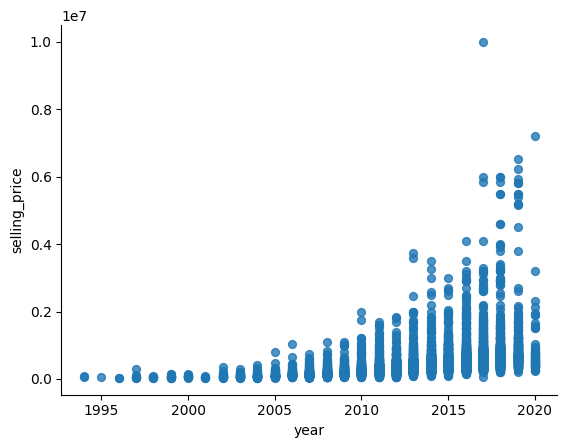

In [ ]:
data.plot(kind='scatter', x='year', y='selling_price', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

co z test drive car???

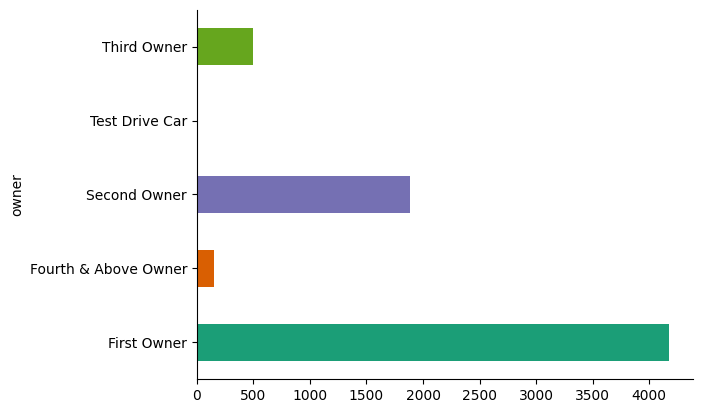

In [ ]:
data.groupby('owner').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

Wykres przedstawiający podział sprzedawanych aut na posiadające automatyczną lub ręczną skrzynie biegów.

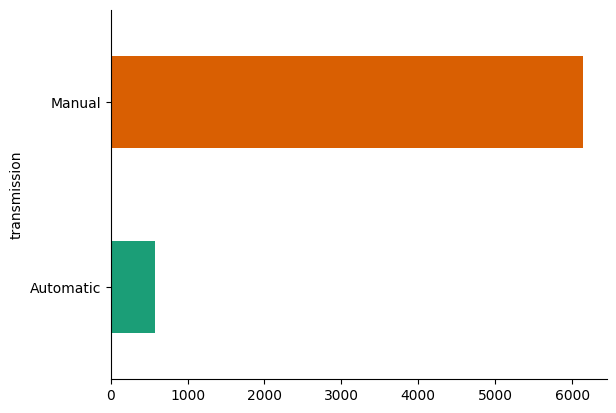

In [ ]:
data.groupby('transmission').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)